<a href="https://colab.research.google.com/github/bella470/Python_Class_DST/blob/main/KNN_BreastCancerProj_Dr_Vers_240724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data 2.txt', header = None)

df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.head(10)

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
#Id column is not needed thus can be drop

df = df.drop('Id', axis = 1)

df.head(10)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Change the type first using numerics so  we can detect string in the column

In [9]:
#convert the feature to numeric

#automotically non-related to Nan
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [10]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
df['Bare_Nuclei'].median()

1.0

9,7 and 6 can be considered as outliers and theres a huge gap betwween the data.

We decide to take the median to replace the missing value.

In [13]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [14]:
df['Bare_Nuclei'].replace(np.nan, df['Bare_Nuclei'].median(), inplace = True)

df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Distribution not normal but this one later. we focus on KNN

In [15]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

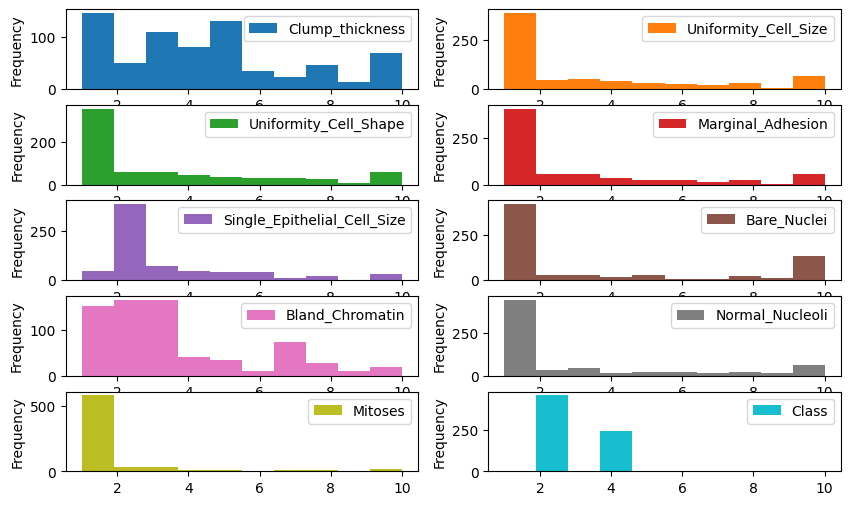

In [18]:
#histogram
#good way

from pickle import BINSTRING

plt.rcParams['figure.figsize'] = (10, 6)

df.plot(kind='hist', bins=10, subplots=True, sharey=False, layout=(5,2), sharex=False)
plt.show()


In [17]:
correlations = df.corr()

correlations['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.818968
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

In [19]:
#no need to mention inplace =True cause we already assign to variable
X = df.drop('Class', axis = 1)
y = df['Class']

In [20]:
#split train and test set

from sklearn.model_selection import train_test_split

# once random_state activated even =0, it will reshuffle the datasets
#Funfact: 42 is the number of a US movie many years ago, that's why it used here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (559, 9) (559,)
Test set: (140, 9) (140,)


In [22]:
#normalization
from sklearn.preprocessing import StandardScaler

#standardize features in datasets
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train[:5]

array([[ 0.16488604, -0.38317451, -0.76069772, -0.64250678, -0.55496377,
        -0.69889302, -0.18320521, -0.60149186, -0.34972397],
       [ 0.16488604, -0.05465526, -0.09627581,  0.40562928, -0.55496377,
         0.113334  , -0.18320521,  0.39230306, -0.34972397],
       [-1.23695875, -0.71169376, -0.76069772, -0.29312809, -0.55496377,
        -0.69889302, -0.18320521, -0.60149186, -0.34972397],
       [ 0.16488604, -0.71169376, -0.76069772, -0.64250678, -0.55496377,
        -0.69889302, -0.58640093, -0.60149186, -0.34972397],
       [-0.88649755, -0.71169376, -0.09627581, -0.29312809, -0.55496377,
        -0.69889302, -0.58640093, -0.60149186, -0.34972397]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#should be integer
#have default value if not mention
neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluate
#use accuracy score, it compare actual result and predicted result
print('The accuracy of the model is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy of the model is:  98.57142857142858


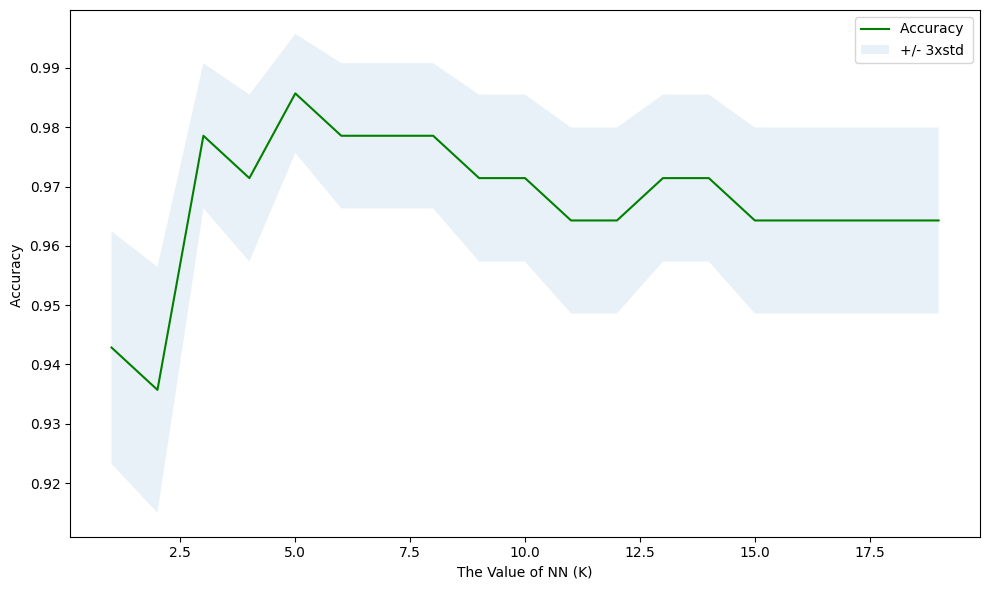



The best accuracy was with 0.9857142857142858 with k= 5


In [24]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)

print('The confusion Matrix is ', cm)

print ('')

print ('TP is ', cm[0][0])
print ('FP is ', cm[0][1])
print ('FN is ', cm[1][0])
print ('TN is ', cm[1][1])

The confusion Matrix is  [[94  1]
 [ 1 44]]

TP is  94
FP is  1
FN is  1
TN is  44


The correct prediction is TP and TN which means 94 + 44 = 138, and incorrect prediction is FP and FN, which means 1 + 1 = 2

Check over fitting

When the model is high accuracy. If the high on training set but low on test sets.

In [30]:
print('The accuracy based in training set is: ', neigh.score(X_train, y_train))
print('The accuracy based in test set is: ', neigh.score(X_test, y_test))

The accuracy based in training set is:  0.9660107334525939
The accuracy based in test set is:  0.9642857142857143
